In [ ]:
import torch as T
from tqdm.notebook import tqdm
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

In [ ]:
trainset = T.utils.data.DataLoader(train, batch_size=128, shuffle=True)
testset = T.utils.data.DataLoader(test, batch_size=512, shuffle=False)

In [ ]:
for data in trainset:
    print(data)
    break

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from ipywidgets import interact, IntSlider

@interact(i=IntSlider(min=0, max=len(data[0])-1, step=1, value=0))
def plot_data(i):
    x, y = data[0][i], data[1][i]

    plt.imshow(x.view(28, 28), cmap='gray')
    plt.title(f'это {y.item()}')
    plt.show()

In [ ]:
from collections import Counter

In [ ]:
counter_dict = Counter(range(10))
total = 0
for data in tqdm(trainset):
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

In [ ]:
counter_dict

In [ ]:
for i in counter_dict:
    print(f'{i}: {counter_dict[i]/total*100 :>5.2f} %')

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class MyFirstNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    
    def paint_and_guess(self, x):
        with T.no_grad():
            guess = self.forward(x)
            plt.imshow(x.view(28, 28), cmap='gray')
            plt.title(f'Моя сеть утверждает, что это {T.argmax(guess)}')
            plt.show()
        
net = MyFirstNet()
print(net)

In [ ]:
x = T.rand((3, 28, 28))
net(x)

In [ ]:
x = T.rand((28, 28))
net.paint_and_guess(x)

In [ ]:
for n in net.parameters():
    print(n)

In [ ]:
sum([p.numel() for p in net.parameters()])

In [ ]:
import torch.optim as optim

net = MyFirstNet()

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()

train_losses = []
train_acc = []
test_acc = []

In [ ]:
for epoch in tqdm(range(3)): 
    for data in tqdm(trainset): 
        X, y = data 
        net.zero_grad()  
        output = net(X)  
        loss = loss_function(output, y)  
        loss.backward()  
        optimizer.step() 
    train_losses.append(loss.item())
    
    with T.no_grad():
        correct = 0
        total = 0
        for data in trainset:
            X, y = data
            output = net(X)
            output = output
            for idx, i in enumerate(output):
                if T.argmax(i) == y[idx]:
                    correct += 1
                total += 1
        train_acc.append(correct/total)
        correct = 0
        total = 0
        for data in testset:
            X, y = data
            output = net(X)
            output = output
            for idx, i in enumerate(output):
                if T.argmax(i) == y[idx]:
                    correct += 1
                total += 1
        test_acc.append(correct/total)
    

In [ ]:
import numpy as np

# train_losses = []

plt.plot(np.array(train_acc)*100, label='Точность тренеровочного сета, %')
plt.plot(np.array(test_acc)*100, label='Точность тестового сета, %')
plt.grid()
plt.legend()
plt.show()

In [ ]:
correct = 0
total = 0

wrongs = []
rights = []
with T.no_grad():
    for data in tqdm(testset):
        X, y = data
        output = net(X)
        
        output = output
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if T.argmax(i) == y[idx]:
                correct += 1
                rights.append((X[idx], y[idx]))
            else:
                wrongs.append((X[idx], y[idx]))
            total += 1

print("Accuracy: ", round(correct/total, 3))

In [ ]:
len(wrongs)

In [ ]:
from ipywidgets import interact, IntSlider

@interact(i=IntSlider(min=0, max=len(wrongs)-1, step=1, value=0))
def print_wrongs(i):    
    right_answ = wrongs[i][1]
    print(f'Правильный ответ {right_answ.item()}')
    net.paint_and_guess(wrongs[i][0])

In [ ]:
@interact(i=IntSlider(min=0, max=len(rights)-1, step=10, value=0))
def print_rights(i):    
    right_answ = rights[i][1]
    print(f'Правильный ответ {right_answ.item()}')
    net.paint_and_guess(rights[i][0])

.

.

.

.

.

.

.

.

.

.

.


.

.

.

.


.


.


.


.

















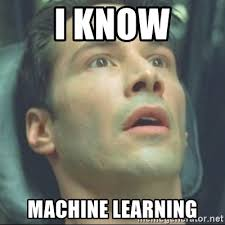